A model of cyclic transcriptomic behavior in the cyanobacterium Cyanothece sp. ATCC 51142

https://pubs.rsc.org/en/content/articlelanding/2011/MB/c1mb05006k#!divAbstract

0 or 1 or 2 or 3 denoting negative or positive or feedback or unknown interaction

In [2]:
#importing the modules
import networkx as nx
import matplotlib.pyplot as plt

Only captured the interactions which where considered important by the author and was common in both the CLR and Inferelator methods. 

In [12]:
# only taking the common nodes between two separate methods
nodes = ['patB','rpaA','ntcA','sigD','fur1','sigB','nifHDK']
edges = [('patB','rpaA',{'weight':0}),('patB','ntcA',{'weight':0}),('patB','nifHDK',{'weight':1}),
         ('rpaA','sigD',{'weight':1}),('rpaA','fur1',{'weight':1}),('sigB','ntcA',{'weight':1})]
G2 = nx.Graph()
G2.add_nodes_from(nodes)
G2.add_edges_from(edges)

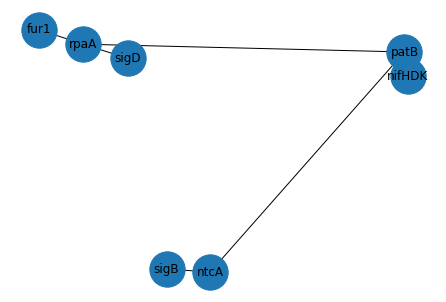

In [13]:
nx.draw(G2,with_labels=True,node_size=1250)

# Algorithms used to predict the network.

We first inferred networks between genes using Pearson correlation or the context likelihood of relatedness (CLR) method. Each method uses the similarities between expression profiles of genes to determine relationships that can represent regulation (gene A regulates gene B), co-regulation (genes A and B are both regulated by gene C) or co-expression (genes A and B expressed at the same time). 

# Context Likelihood of Relatedness method

The original relevance networks method used mutual information for scoring the similarity between the expression levels of two genes in a set of microarrays. A gene and a transcription factor are predicted to interact if the mutual information between the expression levels of the gene and its potential regulator is above some set threshold. Like correlation, mutual information is a metric that detects statistical dependence between two variables. But unlike correlation, it does not assume linearity, continuity, or other specific properties of the dependence. 

The CLR algorithm builds upon the relevance network but applies an adaptive background correction step to eliminate false correlations and indirect influences. After computing the mutual information between regulators and their potential target genes, CLR calculates the statistical likelihood of each mutual information value within its network context. The algorithm compares the mutual information between a transcription factor/gene pair to the ‘‘background’’ distribution of mutual information scores for all possible transcription factor/gene pairs that include either the transcription factor or its target. The most probable interactions are those whose mutual information scores stand significantly above the background distribution of mutual information scores. This step removes many of the false correlations in the network by eliminating ‘‘promiscuous’’ cases, where one transcription factor weakly co-varies with a large numbers of genes, or one gene weakly co-varies with many transcription factors. Such promiscuity arises when the assayed conditions are inadequately or unevenly sampled, thus failing to distinguish direct interactions from indirect influences, or when microarray normalization fails to remove false background correlations due to inter-lab variations in methodology.